# Trabajo práctico integrador

**Nombre**: Fabian S.

## Primera Parte (Clase 1 y 2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

### Primer ejercicio


In [2]:
#Function to calculate norm of vector with p >= 1
def vector_norm(vector_x,p):

    x_p=0
    for j in range(len(vector_x)):
        x_p += pow(abs(vector_x[j]), p)
        x_final = pow(x_p, 1/p)
    return  x_final

#Infinity norm
def norm_vector(vector_x, type):
    if type == "infinity":
        return abs(np.max(vector_x))
    elif type == "zero":    
        return np.count_nonzero(vector_x)
    raise ValueError ("Argumento no permitido") 

x_vector = np.random.random(10)
print(x_vector)
l = 5

vector_norm(x_vector, l)
#zero norm of vector
type = "zero"
norm_vector(x_vector, type )

#Infinite norm of vector
type = "infinity"
norm_vector(x_vector, type)

[0.37485195 0.82085095 0.48823997 0.34157646 0.4066165  0.11697221
 0.22817524 0.40031166 0.3635319  0.02330287]


0.8208509485346499

### Segundo Ejercicio

In [3]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

In [4]:
true_positive_rate = np.sum((truth)&(prediction))
print(f'La tasa de verdaderos positivos es', true_positive_rate)

La tasa de verdaderos positivos es 3


In [5]:
true_negative_rate = np.sum((truth == 0)&(prediction == 0))
print(f'La tasa de verdaderos negativos es', true_negative_rate)

La tasa de verdaderos negativos es 1


In [6]:
false_positive_rate = np.sum((truth==1)&(prediction==1))
print(f'La tasa de falsos negativos es:', false_positive_rate)

La tasa de falsos negativos es: 3


In [7]:
false_negative_rate = np.sum((truth==1)&(prediction==0))
print(f'La tasa de falsos negativos es:', false_negative_rate)

La tasa de falsos negativos es: 3


In [8]:
#Calculo de la precisión
precision = (true_positive_rate) / (true_positive_rate + false_positive_rate)
print(f'La precision calculada es:', precision)

La precision calculada es: 0.5


In [9]:
#Calculo de recall
recall =  (true_positive_rate) / (true_positive_rate + false_negative_rate)
print(f'El valor de recall calculado es:', recall)

El valor de recall calculado es: 0.5


In [10]:
#Calculo de accuracy
accuracy = (true_positive_rate + true_negative_rate) / (true_positive_rate + true_negative_rate + false_positive_rate + false_negative_rate)
print(f'El valor de la accuracy calculada es:', accuracy)

El valor de la accuracy calculada es: 0.4


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

## Segunda Parte (Clase 3 y 4)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

In [12]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [13]:
import pandas as pd
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


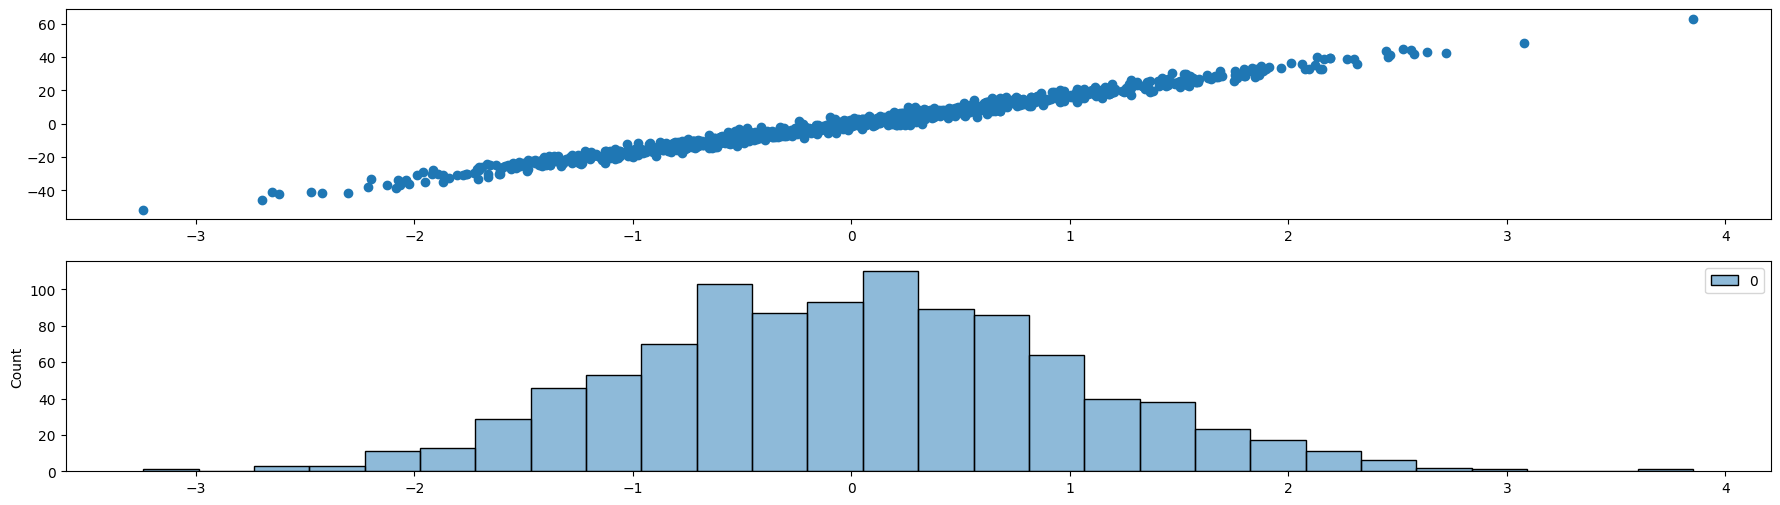

In [14]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [15]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [16]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

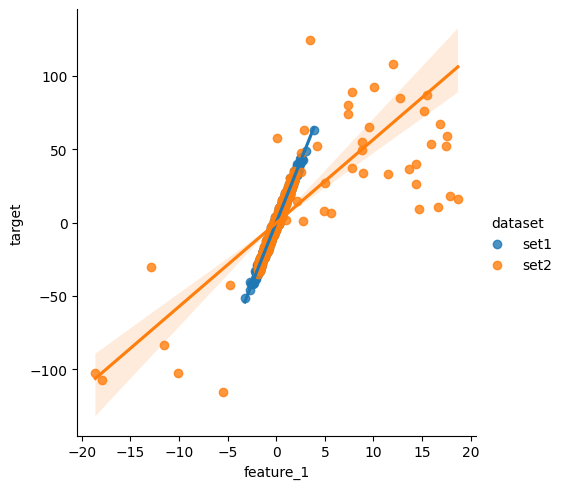

In [17]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [18]:
import pandas as pd
#Generacion de datasets
df_generado = pd.DataFrame(np.random.randint(0,25, size=(25,5)), columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Target'])
df_generado
df_generado.shape

(25, 5)

In [19]:
def split(df: pd.DataFrame):
    df_shuffled = df.sample(frac=1)
    #sp => Split factor
    sf_train = 0.7
    sf_test = 0.9

    X = df_shuffled[0:len(df_shuffled), :df_shuffled.shape[1]-1]
    Y = df_shuffled[0:len(df_shuffled), df_shuffled.shape[1]-1:]
    #Divide features and target
    X_train, X_test, X_val = X[0:int(sf_train*len(X))], X[int(sf_train*len(X)):int(sf_test*len(X))], X[int(sf_test*len(X)):]  
    Y_train, Y_test, Y_val = Y[0:int(sf_train*len(Y))], Y[int(sf_train*len(Y)):int(sf_test*len(Y))], Y[int(sf_test*len(Y)):]  

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:


1. Generar datasets:
    - Uno normal con poco `noise` y pocos outliers
    - Uno con mucho `noise` y pocos outliers
    - Uno con poco `noise` y muchos outliers
    - Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

In [20]:
# Creamos un dataset de prueba
## Utilicen mas `n_features` > 1 y n_informative mas o menos la mitad de n_features
#Poco noise y pocos outliers
X_1, y_1 = make_regression(n_samples = 100,
                       n_features = 10,
                       noise = 20,
                       n_informative = 5,
                       random_state = 42)


new_data = np.append(X_1,y_1.reshape(-1,1),axis=1)


df1 = pd.DataFrame(new_data)


new_col = []
i = 0
for col in df1.columns:
    if i ==  len(df1.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
       
    i += 1
   
df1.columns = new_col

df1.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,-0.926930,-1.430141,1.632411,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.252568,-0.440044,-273.778317
1,0.202923,0.334457,0.285865,1.547505,-0.387702,1.795878,2.010205,-1.515744,-0.612789,0.658544,207.175658
2,-0.241236,0.456753,0.342725,-1.251539,1.117296,1.443765,0.447709,0.352055,-0.082151,0.569767,80.483366
3,0.289775,-1.008086,-2.038125,0.871125,-0.408075,-0.326024,-0.351513,2.075401,1.201214,-1.870792,70.243255
4,-0.007973,-0.190339,-1.037246,0.077368,0.538910,-0.861284,-1.382800,1.479944,1.523124,-0.875618,-36.779252


In [21]:
df1_outlier = generate_outliers(df1,['feature_1'], percentage = 0.1, extreme_outlier = False, two_tailed= True)

In [22]:
#Mucho noise y pocos outliers
X_2, y_2 = make_regression(n_samples = 100,
                       n_features = 10,
                       noise = 200,
                       n_informative = 5,
                       random_state = 42)


new_data_two= np.append(X_2,y_2.reshape(-1,1),axis=1)


df2 = pd.DataFrame(new_data_two)


new_col = []
i = 0
for col in df2.columns:
    if i ==  len(df2.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
       
    i += 1
   
df2.columns = new_col


df2.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,-0.926930,-1.430141,1.632411,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.252568,-0.440044,-77.390018
1,0.202923,0.334457,0.285865,1.547505,-0.387702,1.795878,2.010205,-1.515744,-0.612789,0.658544,172.976668
2,-0.241236,0.456753,0.342725,-1.251539,1.117296,1.443765,0.447709,0.352055,-0.082151,0.569767,609.278879
3,0.289775,-1.008086,-2.038125,0.871125,-0.408075,-0.326024,-0.351513,2.075401,1.201214,-1.870792,137.613665
4,-0.007973,-0.190339,-1.037246,0.077368,0.538910,-0.861284,-1.382800,1.479944,1.523124,-0.875618,-45.855365


In [23]:
poco_outlier = 0.01
df2_outlier= generate_outliers(df2,['feature_1'], percentage = poco_outlier, extreme_outlier = False, two_tailed= True)

In [24]:
#Poco noise y muchos outliers
X_3, y_3 = make_regression(n_samples = 100,
                       n_features = 10,
                       noise = 200,
                       n_informative = 5,
                       random_state = 42)


new_data_two= np.append(X_3,y_3.reshape(-1,1),axis=1)


df3 = pd.DataFrame(new_data_two)

new_col = []
i = 0
for col in df3.columns:
    if i ==  len(df3.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
       
    i += 1
   
df3.columns = new_col


df3.head()



,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,-0.926930,-1.430141,1.632411,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.252568,-0.440044,-77.390018
1,0.202923,0.334457,0.285865,1.547505,-0.387702,1.795878,2.010205,-1.515744,-0.612789,0.658544,172.976668
2,-0.241236,0.456753,0.342725,-1.251539,1.117296,1.443765,0.447709,0.352055,-0.082151,0.569767,609.278879
3,0.289775,-1.008086,-2.038125,0.871125,-0.408075,-0.326024,-0.351513,2.075401,1.201214,-1.870792,137.613665
4,-0.007973,-0.190339,-1.037246,0.077368,0.538910,-0.861284,-1.382800,1.479944,1.523124,-0.875618,-45.855365


In [25]:
#Outliers
muchos_outliers = 0.6
df3_outlier= generate_outliers(df3,['feature_1'], percentage = muchos_outliers, extreme_outlier = False, two_tailed= True)

In [26]:
#Mucho noise y muchos outliers
X_4, y_4 = make_regression(n_samples = 100,
                       n_features = 10,
                       noise = 200,
                       n_informative = 5,
                       random_state = 42)


new_data_two= np.append(X_4,y_4.reshape(-1,1),axis=1)

df4 = pd.DataFrame(new_data_two)

new_col = []
i = 0
for col in df4.columns:
    if i ==  len(df4.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
       
    i += 1
   
df4.columns = new_col


df4.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,-0.926930,-1.430141,1.632411,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.252568,-0.440044,-77.390018
1,0.202923,0.334457,0.285865,1.547505,-0.387702,1.795878,2.010205,-1.515744,-0.612789,0.658544,172.976668
2,-0.241236,0.456753,0.342725,-1.251539,1.117296,1.443765,0.447709,0.352055,-0.082151,0.569767,609.278879
3,0.289775,-1.008086,-2.038125,0.871125,-0.408075,-0.326024,-0.351513,2.075401,1.201214,-1.870792,137.613665
4,-0.007973,-0.190339,-1.037246,0.077368,0.538910,-0.861284,-1.382800,1.479944,1.523124,-0.875618,-45.855365


In [27]:
df4_outlier= generate_outliers(df4,['feature_1'], percentage = muchos_outliers, extreme_outlier = False, two_tailed= True)

In [28]:
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNet
from sklearn.metrics import r2_score

#Comparar con distintos niveles y outliers de la regresión

#Split the data into training(0.8) /testing sets (0.2)
X_1_train= df1_outlier.iloc[:80,:-2] 
X_1_test = df1_outlier.iloc[80:,:-2]

#Split the targets into train/testing sets
y_1_train = df1_outlier.iloc[:80, -1]
y_1_test = df1_outlier.iloc[80:, -1]

#Create linear regression objet
linear_regression = LinearRegression()

#Train the model using the training sets
linear_regression.fit(X_1_train, y_1_train)

#Make predictions using the testing test
y1_pred_lr = linear_regression.predict(X_1_test)

#The mean squared error
y1_lr_mse = mean_squared_error(y_1_test, y1_pred_lr)
y1_lr_r2_score = r2_score(y_1_test, y1_pred_lr)
metric1_lr=[y1_lr_mse, y1_lr_r2_score]

#Create Hubert regressor object
huber = HuberRegressor()
huber.fit(X_1_train, y_1_train)

#Make predictios using the testing test
y1_pred_hb = huber.predict(X_1_test)
print("Huber coefficients", huber.coef_)

#Metrics for Huber regressor
y1_hb_mse = mean_squared_error(y_1_test, y1_pred_hb)
y1_hb_r2_score = r2_score(y_1_test, y1_pred_hb)
metric1_hb = [y1_hb_mse, y1_hb_r2_score]

#Create Elastinet regressor objet
alpha = 0.1
enet = ElasticNet(alpha = alpha, l1_ratio = 0.7)
enet.fit(X_1_train, y_1_train)
y1_pred_enet = enet.predict(X_1_test)

#Metrics for elastic net
y1_enet_mse = mean_squared_error(y_1_test, y1_pred_enet)
y1_enet_r2_score = r2_score(y_1_test, y1_pred_enet)
metric1_enet = [y1_enet_mse, y1_enet_r2_score]


Huber coefficients [12.75003406  0.19506016 -2.63178296 62.22141557  3.41937288 67.58548131
  0.52059336  7.4143636   3.85104027]


In [29]:

#Split the data into training(0.8) /testing sets (0.2)
X_2_train= df2_outlier.iloc[:80,:-2] 
X_2_test = df2_outlier.iloc[80:,:-2]

#Split the targets into train/testing sets
y_2_train = df2_outlier.iloc[:80, -1]
y_2_test = df2_outlier.iloc[80:, -1]

#Create linear regression objet
linear_regression_2 = LinearRegression()

#Train the model using the training sets
linear_regression_2.fit(X_2_train, y_2_train)

#Make predictions using the testing test
y2_pred = linear_regression.predict(X_2_test)

#Metrics for linear regression
y2_lr_mse = mean_squared_error(y_2_test, y2_pred)
y2_lr_r2_score = r2_score(y_2_test, y2_pred)
metric2_lr = [y2_lr_mse, y2_lr_r2_score]

#Create Hubert regressor object
huber_2 = HuberRegressor()
huber_2.fit(X_2_train, y_2_train)

#Make predictios using the testing test
y2_pred_hb = huber.predict(X_2_test)
print("Huber coefficients", huber.coef_)

#Metrics for Hubber regressor
y2_hb_mse = mean_squared_error(y_2_test, y2_pred_hb)
y2_hb_r2_score = r2_score(y_2_test, y2_pred_hb)
metric2_hb = [y2_hb_mse, y2_hb_r2_score]

#Create Elastinet regressor objet
alpha = 0.1
enet = ElasticNet(alpha = alpha, l1_ratio = 0.7)
enet.fit(X_2_train, y_2_train)
y2_pred_enet = enet.predict(X_2_test)

#Metrics for elastic net
y2_enet_mse = mean_squared_error(y_2_test, y2_pred_enet)
y2_r2_score_enet = r2_score(y_2_test, y2_pred_enet)
metric2_enet = [y2_enet_mse, y2_r2_score_enet]


Huber coefficients [12.75003406  0.19506016 -2.63178296 62.22141557  3.41937288 67.58548131
  0.52059336  7.4143636   3.85104027]


In [30]:

#Split the data into training(0.8) /testing sets (0.2)
X_3_train= df3_outlier.iloc[:80,:-2] 
X_3_test = df3_outlier.iloc[80:,:-2]

#Split the targets into train/testing sets
y_3_train = df3_outlier.iloc[:80, -1]
y_3_test = df3_outlier .iloc[80:, -1]

#Create linear regression objet
linear_regression_3 = LinearRegression()

#Train the model using the training sets
linear_regression_3.fit(X_3_train, y_3_train)

#Make predictions using the testing test
y3_pred = linear_regression.predict(X_3_test)

#Metrics for linear regression
y3_lr_mse = mean_squared_error(y_3_test, y3_pred)
y3_lr_r2_score = r2_score(y_3_test, y3_pred)
metric3_lr = [y3_lr_mse, y3_lr_r2_score]

#Create Hubert regressor object
huber_3 = HuberRegressor()
huber_3.fit(X_3_train, y_3_train)

#Make predictios using the testing test
y3_pred_hb = huber.predict(X_3_test)
print("Huber coefficients", huber.coef_)

#Metrics for Huber regressor
y3_hb_mse = mean_squared_error(y_3_test, y3_pred_hb)
y3_hb_r2_score = r2_score(y_3_test, y3_pred_hb)
metric3_hb = [y3_hb_mse, y3_hb_r2_score]

#Create Elastinet regressor objet
alpha = 0.1
enet_3 = ElasticNet(alpha = alpha, l1_ratio = 0.7)
enet_3.fit(X_3_train, y_3_train)

y3_pred_enet = enet_3.predict(X_3_test)

#Metrics for elastic net regressor
y3_enet_mse = mean_squared_error(y_3_test, y3_pred_enet)
y3_enet_r2_score = r2_score(y_3_test, y3_pred_enet)
metric3_enet  = [y3_enet_mse, y3_enet_r2_score]

Huber coefficients [12.75003406  0.19506016 -2.63178296 62.22141557  3.41937288 67.58548131
  0.52059336  7.4143636   3.85104027]


In [31]:

#Split the data into training(0.8) /testing sets (0.2)
X_4_train= df4_outlier.iloc[:80,:-2] 
X_4_test = df4_outlier.iloc[80:,:-2]

#Split the targets into train/testing sets
y_4_train = df4_outlier.iloc[:80, -1]
y_4_test = df4_outlier.iloc[80:, -1]

#Create linear regression objet
linear_regression_4 = LinearRegression()

#Train the model using the training sets
linear_regression_4.fit(X_4_train, y_4_train)

#Make predictions using the testing test
y4_pred = linear_regression.predict(X_4_test)

#The mean squared error
y4_lr_mse = mean_squared_error(y_4_test, y4_pred)
y4_lr_r2_score = r2_score(y_4_test, y4_pred)
metric4_lr = [y4_lr_mse, y4_lr_r2_score]

#Create Hubert regressor object
huber_4 = HuberRegressor()
huber_4.fit(X_4_train, y_4_train)

#Make predictios using the testing test
y4_pred_hb = huber.predict(X_4_test)
print("Huber coefficients", huber.coef_)

#Metrics for Hubbert regresor
y4_hb_mse = mean_squared_error(y_4_test, y4_pred_hb)
y4_hb_r2_score = r2_score(y_4_test, y4_pred_hb)
metric4_hb = [y4_hb_mse, y4_hb_r2_score]

#Create Elastinet regressor objet
alpha = 0.1
enet_4 = ElasticNet(alpha = alpha, l1_ratio = 0.7)
enet_4.fit(X_4_train, y_4_train)

y4_pred_enet = enet_4.predict(X_4_test)

#Metrics for elastic net regressor
y4_enet_mse = mean_squared_error(y_4_test, y4_pred_enet)
y4_r2_score_enet = r2_score(y_4_test, y4_pred_enet)
metric4_enet = [y4_enet_mse, y4_r2_score_enet]

Huber coefficients [12.75003406  0.19506016 -2.63178296 62.22141557  3.41937288 67.58548131
  0.52059336  7.4143636   3.85104027]


<h1> Metrics <h1>

<h3> Linear regression <h3>

In [32]:
print("Medición del mse y r2 score para los diferentes datasets en la regresión lineal:")
metric1_lr, metric2_lr, metric3_lr, metric4_lr

Medición del mse y r2 score para los diferentes datasets en la regresión lineal:


([801.3468484986023, 0.9003468879048887],
 [44862.75947572802, 0.1674153844119054],
 [44931.828421765116, 0.16613356977193683],
 [44770.24143103943, 0.1691323786755704])

<h3> Hubert <h3>

In [33]:
print("Medición del mse y r2 score para los diferentes datasets empleando el regresor de Hubbert:")
metric1_hb, metric2_hb, metric3_hb, metric4_hb


Medición del mse y r2 score para los diferentes datasets empleando el regresor de Hubbert:


([867.8514965627965, 0.8920765675550875],
 [45462.94878091709, 0.15627678331423356],
 [45531.08097063701, 0.15501235344745667],
 [45371.31203080296, 0.15797742209033894])

<h3> Elastic Net <h3>

In [34]:
print("Medición del mse y r2 score para los diferentes datasets empleando el regresor de Elastic Net:")
metric1_enet, metric2_enet, metric3_enet, metric4_enet

Medición del mse y r2 score para los diferentes datasets empleando el regresor de Elastic Net:


([877.4150729238933, 0.8908872696263215],
 [49746.343037542465, 0.07678349751904867],
 [47888.176442763644, 0.11126824473682895],
 [48921.75195070815, 0.09208665454889542])

<h2> Ploteo de los datasets<h2>

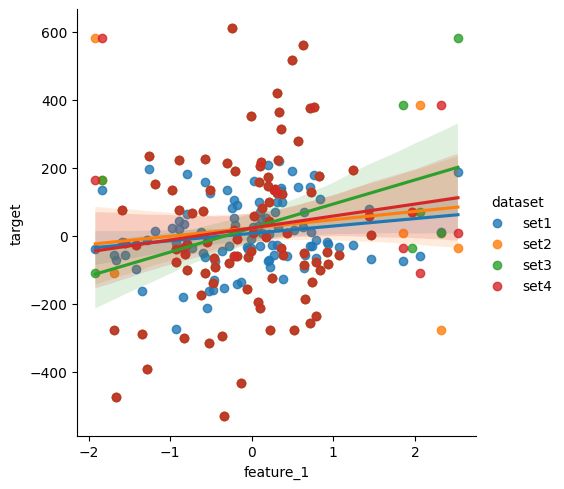

In [35]:
sns.lmplot(data = pd.concat([df1_outlier.assign(dataset = 'set1'),
                                 df2_outlier.assign(dataset = 'set2'), df3_outlier.assign(dataset= "set3"), df4_outlier.assign(dataset="set4")]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`